# HEART DISEASSE DETECTION

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore


import warnings
warnings.filterwarnings("ignore") 

## Read dataset

In [2]:
data_set = pd.read_csv('heart_all.csv')
data_set

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Exploring data

In [3]:
data_set.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Remove nulls if exist

In [5]:
data_set.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
data_set.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
data_set.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
data_set.describe(exclude=[np.number])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


## Remove duplicates if exists

In [9]:
data_set.duplicated().sum()

18078

In [10]:
data_set = data_set.drop_duplicates()

In [11]:
data_set.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
data_set['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [13]:
data_set['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

## Replace strings with numirical logical values

In [14]:
obj=data_set.select_dtypes(include=object).columns
pd.DataFrame(obj,columns=['Object Columns'])

,Object Columns
0,HeartDisease
1,Smoking
2,AlcoholDrinking
3,Stroke
4,DiffWalking
5,Sex
6,AgeCategory
7,Race
8,Diabetic
9,PhysicalActivity


##### extract features with datatype = object

In [15]:
label=LabelEncoder()
for col in obj:
    data_set[col]=label.fit_transform(data_set[col])
data_set 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [16]:
data_set2=data_set.copy()

In [17]:
data_set = pd.get_dummies(data_set,columns=['Sex', 'Race', 'Diabetic', 'GenHealth' ]
    , prefix = [ 'Sex','Race', 'Diabetic', 'GenHealth'])

In [18]:
data_set

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,...,Race_5,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
0,0,16.60,1,0,0,3.0,30.0,0,7,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,12,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,9,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,11,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,4,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,8,0,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,3,1,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,5,1,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
X = data_set.drop('HeartDisease', axis=1)
y = data_set['HeartDisease']

In [20]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [21]:
data_set = pd.concat([X_resampled, y_resampled], axis="columns")
data_set.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,...,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,HeartDisease
311481,29.95,0,1,0,2.0,0.0,0,12,1,6.0,...,0,1,0,0,0,0,0,0,1,0
171098,25.84,0,0,0,2.0,0.0,0,0,0,8.0,...,1,0,0,0,0,0,1,0,0,0
151394,34.02,1,0,0,1.0,0.0,0,7,1,7.0,...,1,0,0,0,0,0,1,0,0,0
240390,22.96,1,0,0,0.0,0.0,0,9,0,7.0,...,1,0,0,0,0,0,1,0,0,0
159498,24.21,0,0,0,0.0,20.0,0,0,1,7.0,...,1,0,0,0,0,0,0,0,1,0


In [22]:
# # replacing code here
# data_set["Sex"] = data_set["Sex"].replace({"Male": 1, "Female": 0})
# columns_to_convert = ["HeartDisease", "Smoking", "AlcoholDrinking", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer", "Stroke"]
# for column in columns_to_convert:
#     data_set[column] = data_set[column].replace({"Yes": 1, "No": 0})
# data_set["Male"] = data_set["Sex"]
# data_set["Female"] = 1 - data_set["Sex"]
# data_set = data_set.drop(columns=["Sex", "Race"])
# data_set['GenHealth'] = data_set['GenHealth'].replace({"Excellent": 5, "Very good": 4, "Good": 3, "Fair": 2,"Poor":1 })
# data_set.head()

In [23]:
data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,...,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,HeartDisease
311481,29.95,0,1,0,2.0,0.0,0,12,1,6.0,...,0,1,0,0,0,0,0,0,1,0
171098,25.84,0,0,0,2.0,0.0,0,0,0,8.0,...,1,0,0,0,0,0,1,0,0,0
151394,34.02,1,0,0,1.0,0.0,0,7,1,7.0,...,1,0,0,0,0,0,1,0,0,0
240390,22.96,1,0,0,0.0,0.0,0,9,0,7.0,...,1,0,0,0,0,0,1,0,0,0
159498,24.21,0,0,0,0.0,20.0,0,0,1,7.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,38.45,0,0,1,30.0,15.0,1,7,1,6.0,...,0,0,1,0,0,0,0,1,0,1
319767,36.21,1,0,0,0.0,0.0,1,11,1,8.0,...,0,0,1,0,0,0,1,0,0,1
319781,37.12,1,0,0,0.0,0.0,0,3,1,7.0,...,1,0,0,0,0,0,0,0,1,1
319786,33.20,1,0,0,0.0,0.0,0,8,1,8.0,...,0,0,1,0,0,0,0,0,1,1


## Feature Selection

In [24]:
# plt.figure(figsize=(15, 15))
# correlation_matrix = data_set2.corr()
# heatmap =sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

In [25]:
# data_set.drop('HeartDisease', axis=1).corrwith(data_set.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8),
#                                                      title="Correlation with target")

##### Remove underperforming features

In [26]:
# data_set.drop(["PhysicalActivity", "SleepTime", "Asthma", "AlcoholDrinking","GenHealth","MentalHealth","Race","BMI"], axis="columns", inplace=True)

In [27]:
# data_set.drop('HeartDisease', axis=1).corrwith(data_set.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8), 
#                                             title="Correlation with target")

## Detect & remove outliers

In [28]:
num_data=[]
for i in data_set.columns:
    if data_set[i].dtype==float :
        num_data.append(i)
print(num_data)

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


BMI                  AxesSubplot(0.125,0.125;0.168478x0.755)
PhysicalHealth    AxesSubplot(0.327174,0.125;0.168478x0.755)
MentalHealth      AxesSubplot(0.529348,0.125;0.168478x0.755)
SleepTime         AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

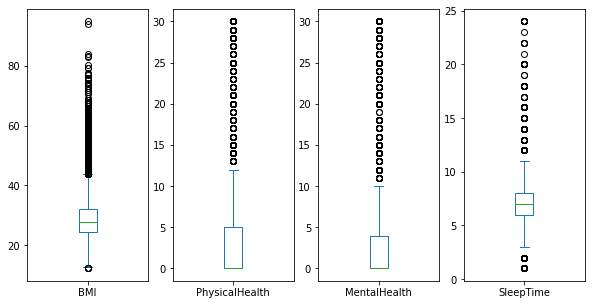

In [29]:
data_set[num_data].plot(kind = "box", figsize = (10,5), subplots = True)

In [30]:
Z_score= zscore(data_set[num_data])
Z_score

,BMI,PhysicalHealth,MentalHealth,SleepTime
311481,0.158610,-0.347421,-0.506976,-0.679590
171098,-0.469030,-0.347421,-0.506976,0.554366
151394,0.780142,-0.447412,-0.506976,-0.062612
240390,-0.908837,-0.547403,-0.506976,-0.062612
159498,-0.717948,-0.547403,1.811697,-0.062612
...,...,...,...,...
319765,1.456650,2.452327,1.232029,-0.679590
319767,1.114578,-0.547403,-0.506976,0.554366
319781,1.253545,-0.547403,-0.506976,-0.062612
319786,0.654920,-0.547403,-0.506976,0.554366


In [31]:
no_outliers = ((Z_score > -3.0) & (Z_score < 3.0)).all(axis=1)
no_outliers

311481    True
171098    True
151394    True
240390    True
159498    True
          ... 
319765    True
319767    True
319781    True
319786    True
319790    True
Length: 54522, dtype: bool

##### Values between -3 and 3 in z_score

In [32]:
clean_data_set =data_set[no_outliers]
clean_data_set

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,SleepTime,...,Diabetic_0,Diabetic_1,Diabetic_2,Diabetic_3,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4,HeartDisease
311481,29.95,0,1,0,2.0,0.0,0,12,1,6.0,...,0,1,0,0,0,0,0,0,1,0
171098,25.84,0,0,0,2.0,0.0,0,0,0,8.0,...,1,0,0,0,0,0,1,0,0,0
151394,34.02,1,0,0,1.0,0.0,0,7,1,7.0,...,1,0,0,0,0,0,1,0,0,0
240390,22.96,1,0,0,0.0,0.0,0,9,0,7.0,...,1,0,0,0,0,0,1,0,0,0
159498,24.21,0,0,0,0.0,20.0,0,0,1,7.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,38.45,0,0,1,30.0,15.0,1,7,1,6.0,...,0,0,1,0,0,0,0,1,0,1
319767,36.21,1,0,0,0.0,0.0,1,11,1,8.0,...,0,0,1,0,0,0,1,0,0,1
319781,37.12,1,0,0,0.0,0.0,0,3,1,7.0,...,1,0,0,0,0,0,0,0,1,1
319786,33.20,1,0,0,0.0,0.0,0,8,1,8.0,...,0,0,1,0,0,0,0,0,1,1


In [33]:
number_of_outliers=data_set.shape[0]-clean_data_set.shape[0]
number_of_outliers

1781

In [34]:
ratio_of_outliers=number_of_outliers/data_set.shape[0]
print(round(ratio_of_outliers*100,1))

3.3
